## Wine 데이터셋으로 PCA 적용하기

In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [19]:
from sklearn.datasets import load_wine
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [20]:
df.shape

(178, 13)

In [21]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [22]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [23]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### PCA 변환

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
wine_std = scaler.fit_transform(wine.data)

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [26]:
wine_pca = pca.fit_transform(wine_std)
wine_pca[:5,:]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082]])

###  시각화

In [28]:
df_pca = pd.DataFrame(wine_pca, columns=['PC1', 'PC2'])
df_pca['class'] = wine.target
df_pca.head()

,PC1,PC2,class
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0


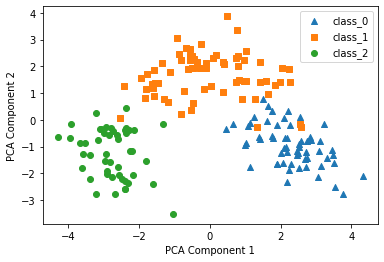

In [30]:
markers = ['^','s','o']

for i, marker in enumerate(markers):
    x_data = df_pca[df_pca['class']==i]['PC1']
    y_data = df_pca[df_pca['class']==i]['PC2']
    plt.scatter(x_data, y_data, marker=marker, label=wine.target_names[i])

plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

### 분류 비교

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#### 1) PCA 전

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    wine_pca, wine.target, stratify=wine.target, random_state=2021
)

In [53]:
dtc = DecisionTreeClassifier(random_state=2021)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test, pred)

0.8888888888888888

#### 2) PCA 후

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, stratify=wine.target, random_state=2021
)

In [56]:
dtc = DecisionTreeClassifier(random_state=2021)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test, pred)

0.9333333333333333

In [57]:
# PCA 설명력
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

### 5개 차원으로 축소후 분류

In [58]:
pca5 = PCA(n_components=5)
wine_pca5 = pca5.fit_transform(wine_std)

In [59]:
# PCA 설명력
pca5.explained_variance_ratio_, np.sum(pca5.explained_variance_ratio_)

(array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294]),
 0.8016229275554787)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(
    wine_pca5, wine.target, stratify=wine.target, random_state=2021)

In [62]:
dtc = DecisionTreeClassifier(random_state=2021)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test, pred)

0.9333333333333333